In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from statistics import mean
from functools import reduce
import math
from scipy.optimize import curve_fit

### Ватт-ваттные характеристики

#### Красный лазер

In [2]:
file = pd.ExcelFile("Красный лазер 1.xlsx")

[   47.41890559 -1508.70643843]
[  2.34686699 421.45264071]


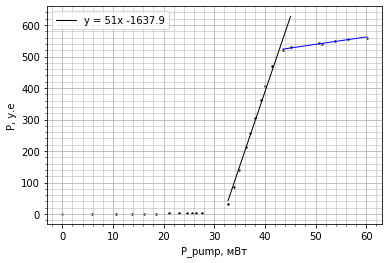

In [3]:
fig, ax = plt.subplots()
W_in = file.parse(sheet_name = 'Лист1', header=0, usecols='D').values.flatten() #мВт
W_out = file.parse(sheet_name = 'Лист1', header=0, usecols='C').values.flatten() #мВт

plt.scatter(W_in, W_out, color = 'black', s = 2)

z = np.polyfit(W_in[12:22], W_out[12:22], 1)
f = np.poly1d(z)
f_new = np.linspace(W_in[12], W_in[22], 100)
l_new = f(f_new)

print(f.c) # вывели коэффициенты a и b соответственно (y = ax+b)

plt.plot(f_new, l_new, linewidth = 1, color = 'black', label = 'y = 51x -1637.9')

z1 = np.polyfit(W_in[21:], W_out[21:], 1)
f1 = np.poly1d(z1)
f1_new = np.linspace(W_in[21], W_in[-1], 100)
l1_new = f1(f1_new)

print(f1.c) # вывели коэффициенты a и b соответственно (y = ax+b)

plt.plot(f1_new, l1_new, linewidth = 1, color = 'blue')


plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('P, у.е')
ax.set_xlabel('P_pump, мВт')
plt.legend()
plt.show()
fig.savefig('Red_lazer_1.png', dpi = 1000)

In [4]:
print('Пороговая мощность = ',(-f.c[1])/f.c[0], 'мВт')
print('Мощность насыщения = ',(f1.c[1]-f.c[1])/(f.c[0]-f1.c[0]),'мВт')

Пороговая мощность =  31.81655965227115 мВт
Мощность насыщения =  42.823869053020346 мВт


#### Красный светодиод

In [5]:
file = pd.ExcelFile("Красный светодиод 1.xlsx")

[0.35503485 1.86642577]


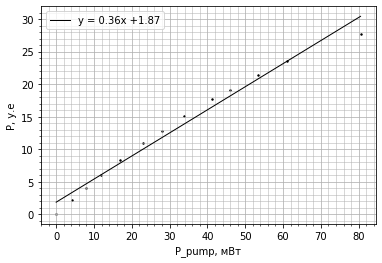

In [6]:
fig, ax = plt.subplots()
W_in = file.parse(sheet_name = 'Лист1', header=0, usecols='D').values.flatten() #мВт
W_out = file.parse(sheet_name = 'Лист1', header=0, usecols='C').values.flatten() #мВт

plt.scatter(W_in, W_out, color = 'black', s = 2)

z2 = np.polyfit(W_in, W_out, 1)
f2 = np.poly1d(z2)
f2_new = np.linspace(W_in[0], W_in[-1], 100)
l2_new = f2(f2_new)

print(f2.c) # вывели коэффициенты a и b соответственно (y = ax+b)

plt.plot(f2_new, l2_new, linewidth = 1, color = 'black', label = 'y = 0.36x +1.87')


plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('P, у.е')
ax.set_xlabel('P_pump, мВт')
plt.legend()
plt.show()
fig.savefig('Red_phdiod_1.png', dpi = 1000)

#### Синий фотодиод

In [7]:
file = pd.ExcelFile("Синий светодиод 1.xlsx")

[0.72949895 1.12940827]


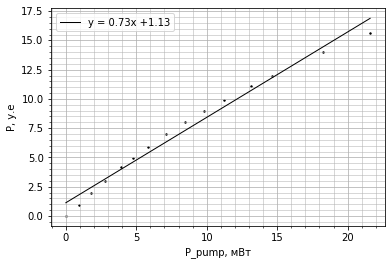

In [8]:
fig, ax = plt.subplots()
W_in = file.parse(sheet_name = 'Лист1', header=0, usecols='D').values.flatten() #мВт
W_out = file.parse(sheet_name = 'Лист1', header=0, usecols='C').values.flatten() #мВт

plt.scatter(W_in, W_out, color = 'black', s = 2)

z3 = np.polyfit(W_in, W_out, 1)
f3 = np.poly1d(z3)
f3_new = np.linspace(W_in[0], W_in[-1], 100)
l3_new = f3(f3_new)

print(f3.c) # вывели коэффициенты a и b соответственно (y = ax+b)

plt.plot(f3_new, l3_new, linewidth = 1, color = 'black', label = 'y = 0.73x +1.13')


plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('P, у.е')
ax.set_xlabel('P_pump, мВт')
plt.legend()
plt.show()
fig.savefig('Blue_phdiod_1.png', dpi = 1000)

#### Зеленый фотодиод

In [9]:
file = pd.ExcelFile("Зеленый светодиод 1.xlsx")

[0.20647911 3.11292919]


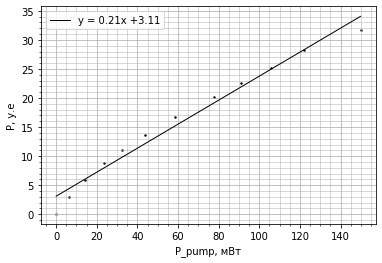

In [10]:
fig, ax = plt.subplots()
W_in = file.parse(sheet_name = 'Лист1', header=0, usecols='D').values.flatten() #мВт
W_out = file.parse(sheet_name = 'Лист1', header=0, usecols='C').values.flatten() #мВт

plt.scatter(W_in, W_out, color = 'black', s = 2)

z4 = np.polyfit(W_in, W_out, 1)
f4 = np.poly1d(z4)
f4_new = np.linspace(W_in[0], W_in[-1], 100)
l4_new = f4(f4_new)

print(f4.c) # вывели коэффициенты a и b соответственно (y = ax+b)

plt.plot(f4_new, l4_new, linewidth = 1, color = 'black', label = 'y = 0.21x +3.11')

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('P, у.е')
ax.set_xlabel('P_pump, мВт')
plt.legend()
plt.show()
fig.savefig('Green_phdiod_1.png', dpi = 1000)

### Спектральные характеристики

#### Красный лазер

In [29]:
file = pd.ExcelFile("Красный лазер 2 накачка 28,95 мВт.xlsx")

[ 2.47156516e-01 -6.43543071e+02  6.28362534e+05 -2.72681873e+08
  4.43740801e+10]


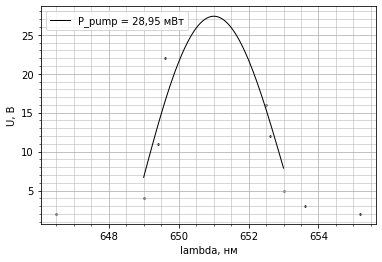

In [35]:
fig, ax = plt.subplots()
Lambda_1 = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #нм
U_1 = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #В

plt.scatter(Lambda_1, U_1, color = 'black', s = 2)

z5 = np.polyfit(Lambda_1, U_1, 4)
f5 = np.poly1d(z5)
f5_new = np.linspace(Lambda_1[1], Lambda_1[-3], 100)
l5_new = f5(f5_new)

print(f5.c) # вывели коэффициенты a и b соответственно (y = ax+b)
plt.plot(f5_new, l5_new, linewidth = 1, color = 'black', label = 'P_pump = 28,95 мВт')

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('U, В')
ax.set_xlabel('lambda, нм')
plt.legend()
plt.show()
fig.savefig('Red_lazer_2_P_pump = 28,95.png', dpi = 1000)

In [38]:
file = pd.ExcelFile("Красный лазер 2 накачка 39,5 мВт.xlsx")

C:\Users\Nata\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


[-1.41364340e-07  2.15877265e-04 -2.05032202e-02 -7.89434457e+01
 -8.43745408e+03  3.92893402e+07 -1.10199450e+10]


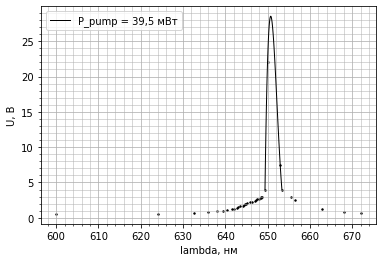

In [40]:
fig, ax = plt.subplots()
Lambda = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #нм
U = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #В

plt.scatter(Lambda, U, color = 'black', s = 2)

z6 = np.polyfit(Lambda[26:-4], U[26:-4], 6)
f6 = np.poly1d(z6)
f6_new = np.linspace(Lambda[26], Lambda[-6], 100)
l6_new = f6(f6_new)

print(f6.c) # вывели коэффициенты a и b соответственно (y = ax+b)

plt.plot(f6_new, l6_new, linewidth = 1, color = 'black', label = 'P_pump = 39,5 мВт')

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('U, В')
ax.set_xlabel('lambda, нм')
plt.legend()
plt.show()
fig.savefig('Red_lazer_2_P_pump = 39,5.png', dpi = 1000)

#### Красный фотодиод

In [15]:
def func(x, a, x0, sigma): 
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) 

In [43]:
file = pd.ExcelFile("Красный светодиод 2 накачка 15,8 мВт.xlsx")

In [44]:
Lambda_1 = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #нм
U_1 = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #В

z5 = np.polyfit(Lambda_1, U_1, 6)
f5 = np.poly1d(z5)
f5_new = np.linspace(Lambda_1[1], Lambda_1[-3], 100)
l5_new = f5(f5_new)

print(f5.c) # вывели коэффициенты a и b соответственно (y = ax+b)


[-2.11223621e-08  8.07668490e-05 -1.28493866e-01  1.08878344e+02
 -5.18288312e+04  1.31426171e+07 -1.38705361e+09]


In [45]:
file = pd.ExcelFile("Красный светодиод 2 накачка 28,95 мВт.xlsx")

[-1.38105351e-08  5.09078420e-05 -7.81814492e-02  6.40291161e+01
 -2.94937378e+04  7.24497363e+06 -7.41461314e+08]


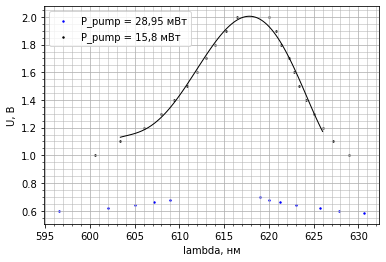

In [47]:
fig, ax = plt.subplots()
Lambda = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #нм
U = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #В


plt.scatter(Lambda, U, color = 'blue', s = 2, label = 'P_pump = 28,95 мВт')
plt.scatter(Lambda_1, U_1, color = 'black', s = 2, label = 'P_pump = 15,8 мВт')

z6 = np.polyfit(Lambda, U, 6)
f6 = np.poly1d(z6)
f6_new = np.linspace(Lambda[1], Lambda[-3], 100)
l6_new = f6(f6_new)

print(f6.c) # вывели коэффициенты a и b соответственно (y = ax+b)

#plt.plot(f6_new, l6_new, linewidth = 1, color = 'blue')
plt.plot(f5_new, l5_new, linewidth = 1, color = 'black')

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('U, В')
ax.set_xlabel('lambda, нм')
plt.legend()
plt.show()
fig.savefig('Red_phdiod_2.png', dpi = 1000)

#### Синий фотодиод

In [20]:
file = pd.ExcelFile("Синий светодиод 2 накачка 15,8 мВт.xlsx")

[-1.20737794e-08  3.34414733e-05 -3.85745672e-02  2.37191829e+01
 -8.19983125e+03  1.51109844e+06 -1.15972067e+08]


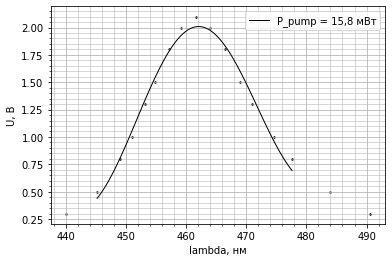

In [21]:
fig, ax = plt.subplots()
Lambda = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #нм
U = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #В


plt.scatter(Lambda, U, color = 'black', s = 2)

z7 = np.polyfit(Lambda, U, 6)
f7 = np.poly1d(z7)
f7_new = np.linspace(Lambda[1], Lambda[-3], 100)
l7_new = f7(f7_new)

print(f7.c) # вывели коэффициенты a и b соответственно (y = ax+b)

plt.plot(f7_new, l7_new, linewidth = 1, color = 'black', label = 'P_pump = 15,8 мВт')

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('U, В')
ax.set_xlabel('lambda, нм')
plt.legend()
plt.show()
fig.savefig('Blue_phdiod_2.png', dpi = 1000)

#### Зеленый фотодиод

In [22]:
file = pd.ExcelFile("Зеленый светодиод 2 накачка 15,8 мВт.xlsx")

[-4.66575022e-10  1.43705562e-06 -1.84209639e-03  1.25790331e+00
 -4.82617255e+02  9.86409735e+04 -8.39081313e+06]


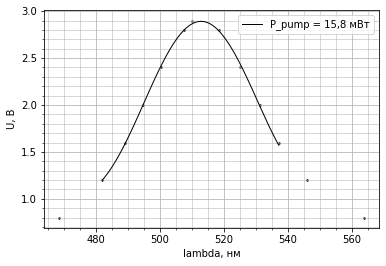

In [23]:
fig, ax = plt.subplots()
Lambda = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #нм
U = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #В


plt.scatter(Lambda, U, color = 'black', s = 2)

z8 = np.polyfit(Lambda, U, 6)
f8 = np.poly1d(z8)
f8_new = np.linspace(Lambda[1], Lambda[-3], 100)
l8_new = f8(f8_new)

print(f8.c) # вывели коэффициенты a и b соответственно (y = ax+b)

plt.plot(f8_new, l8_new, linewidth = 1, color = 'black', label = 'P_pump = 15,8 мВт')

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('U, В')
ax.set_xlabel('lambda, нм')
plt.legend()
plt.show()
fig.savefig('Green_phdiod_2.png', dpi = 1000)